### Descriptive statistics 
This document contains different descriptive statistics

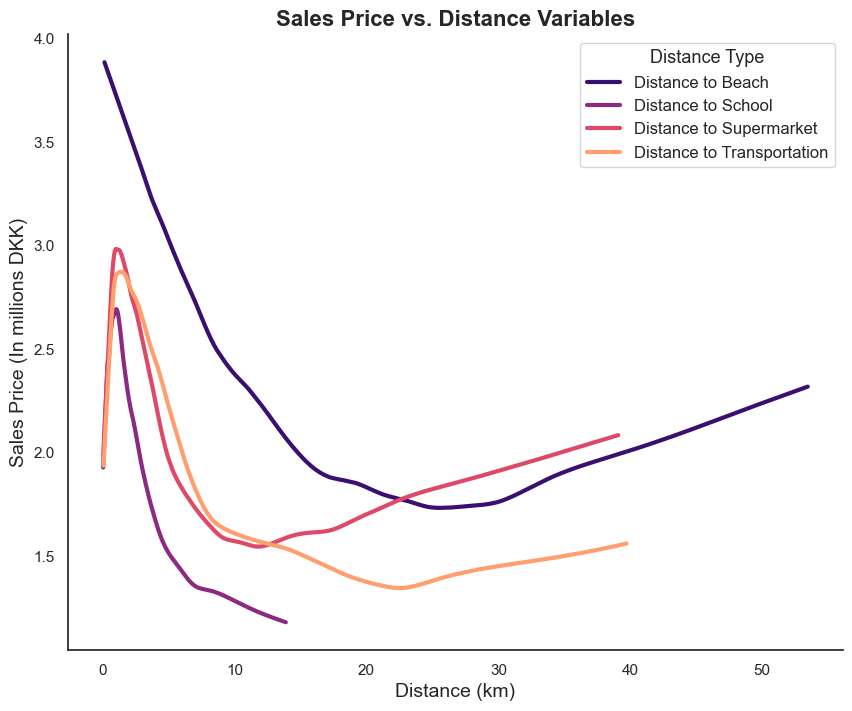

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

# Now we use our final merged and scraped data 
df = pd.read_csv('Boligsiden_med_årnu.csv')

# Again delete missing values 
df = df.dropna().reset_index(drop=True)

# Define the distance variables and their titles
distance_vars = ['Beach Distance (km)', 'School Distance (km)', 'Supermarkets Distance (km)', 'Transport Station Distance (km)']
titles = ['Distance to Beach', 'Distance to School', 'Distance to Supermarket', 'Distance to Transportation']

# I am very tired of blue figures so this one is not blue 
color_palette = sns.color_palette("magma", n_colors=len(distance_vars))

# we setup the plot 
plt.figure(figsize=(10, 8))

# We ensure that sales price is in millions DKK
for i, (distance_var, title) in enumerate(zip(distance_vars, titles)):
    smoothed = lowess(df['Price'] / 1e6, df[distance_var], frac=0.3)
    plt.plot(smoothed[:, 0], smoothed[:, 1], label=title, color=color_palette[i], linewidth=3)

# Create title and labels
plt.title('Sales Price vs. Distance Variables', fontsize=16, weight='bold')
plt.xlabel('Distance (km)', fontsize=14)
plt.ylabel('Sales Price (In millions DKK)', fontsize=14)

plt.legend(title='Distance Type', fontsize=12, title_fontsize=13, loc='best')

#Then we clean a bit 
sns.despine()
plt.savefig('Distance vs. price.png', format='png', bbox_inches='tight', dpi=300)

plt.show()



In [213]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

#We now look at our descriptive stats:
df = pd.read_csv('Boligsiden_med_årnu.csv')
df = df.dropna().reset_index(drop=True)
desc_stats = df.describe().transpose()

print(desc_stats)

                                   count          mean           std  \
Postal code                       8734.0  6.390777e+03  2.232892e+03   
Latitude                          8734.0  5.591641e+01  6.583597e-01   
Longitude                         8734.0  1.050202e+01  1.323077e+00   
Price                             8734.0  3.088266e+06  3.210333e+06   
Days on Market                    8734.0  1.087491e+02  1.705247e+02   
Off. vurdering                    8734.0  2.602618e+06  2.546531e+06   
Monthly expense                   8734.0  2.600206e+03  1.977963e+03   
Transport Station Distance (km)   8734.0  4.501119e+00  4.870413e+00   
Beach Distance (km)               8734.0  1.344795e+01  1.005782e+01   
School Distance (km)              8734.0  1.601977e+00  1.869286e+00   
Restaurant Distance (km)          8734.0  2.872826e+00  2.903747e+00   
Hospital Distance (km)            8734.0  9.763938e+00  7.980309e+00   
Mall Distance (km)                8734.0  1.256314e+01  1.119192

C:\Users\sd101\AppData\Local\Temp\ipykernel_27896\879098697.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Year built', y='Energy label', data=df, order=energy_label_order, palette=palette)
C:\Users\sd101\AppData\Local\Temp\ipykernel_27896\879098697.py:16: UserWarning: 
The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  ax = sns.boxplot(x='Year built', y='Energy label', data=df, order=energy_label_order, palette=palette)


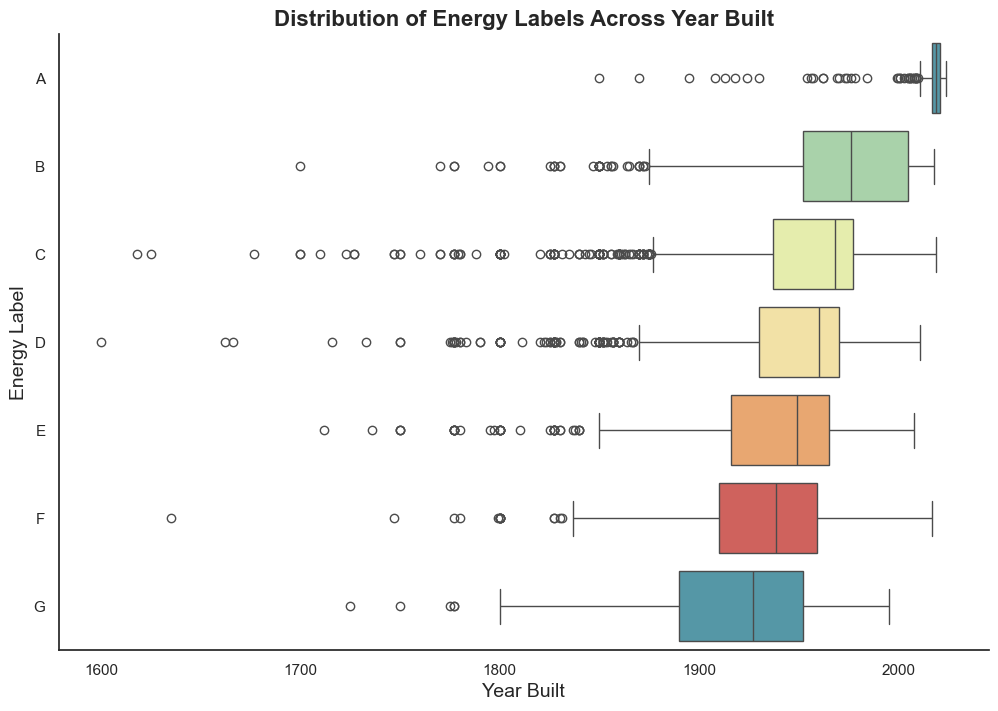

In [6]:
import matplotlib.lines as mlines

#Energylabel boksplot:
df = pd.read_csv('Boligsiden_med_årnu.csv')

# Again drop missing values, it would perhaps have been better to just drop them all and use the same df all througout, fortunately copy paste exists.
df = df.dropna().reset_index(drop=True)

# Define the order of energy labels
energy_label_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

# Reverse color palette so that Bad labels are red/yellows, like on the website 
palette = sns.color_palette("Spectral_r")

plt.figure(figsize=(12, 8)) 
ax = sns.boxplot(x='Year built', y='Energy label', data=df, order=energy_label_order, palette=palette)

plt.title('Distribution of Energy Labels Across Year Built', fontsize=16, weight='bold')
plt.xlabel('Year Built', fontsize=14)
plt.ylabel('Energy Label', fontsize=14)

#We clean :D
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('energy_labels_distribution.png', format='png', bbox_inches='tight', dpi=300)

plt.show()


C:\Users\Isabel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


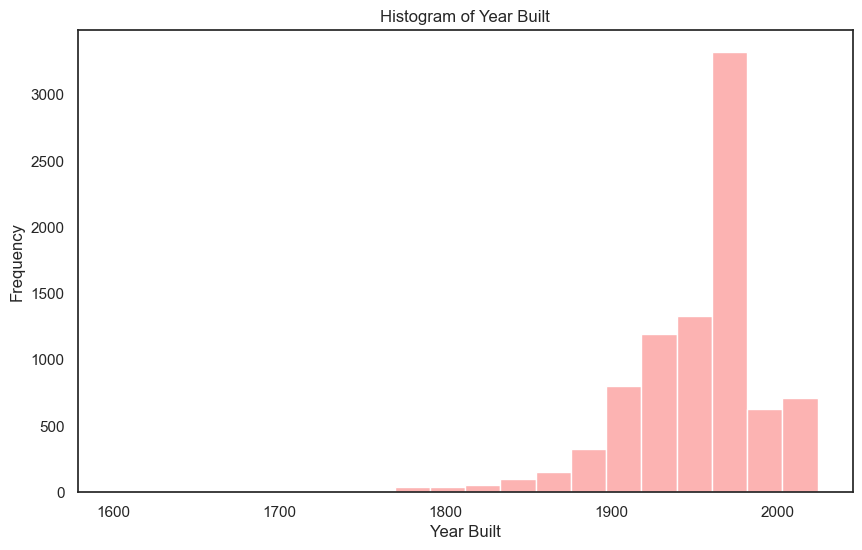

In [258]:
#Histogram over year built 
#First setting a not blue colour 
sns.color_palette("Paired")
palette = sns.color_palette("Paired")
custom_color = palette[4]

plt.figure(figsize=(10, 6))
sns.histplot(df['Year built'], color=custom_color, bins=20, kde=False)


# Adding a title and labels
plt.title('Histogram of Year Built')
plt.xlabel('Year Built')
plt.ylabel('Frequency')

#We clean :D
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('Year built.png', format='png', bbox_inches='tight', dpi=300)

# Show the plot
plt.show()


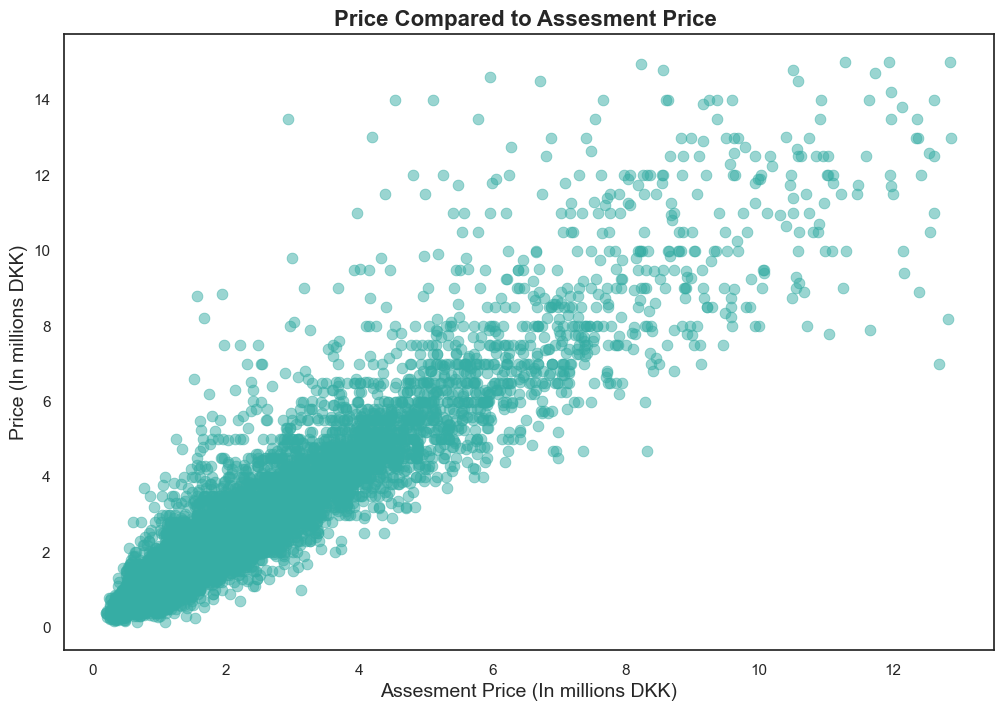

In [7]:
#Sales price compared to off. vurdering 
# Scale 'Price' to millions DKK
df['Price (millions)'] = df['Price'] / 1e6
df['Off. vurdering (millions)'] = df['Off. vurdering'] / 1e6

#First removing the outliers 
price_threshold = df['Price (millions)'].quantile(0.99)
off_vurdering_threshold = df['Off. vurdering (millions)'].quantile(0.99)

df_cleaned = df[(df['Price (millions)'] <= price_threshold) & 
                 (df['Off. vurdering (millions)'] <= off_vurdering_threshold)]

# Found a nice turqouise not blue 
palette = sns.color_palette("husl", 8)
turquoise = palette[4]

# Then we scatter 
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Off. vurdering (millions)', y='Price (millions)', data=df_cleaned, color=turquoise, edgecolor=None, alpha=0.5, s=60)


# Adding a title and labels
plt.title('Price Compared to Assesment Price ', fontsize=16, weight='bold')
plt.xlabel('Assesment Price (In millions DKK)', fontsize=14)
plt.ylabel('Price (In millions DKK)', fontsize=14)


plt.savefig('Price og offentlig vurdering.png', format='png')
# Show the plot
plt.show()


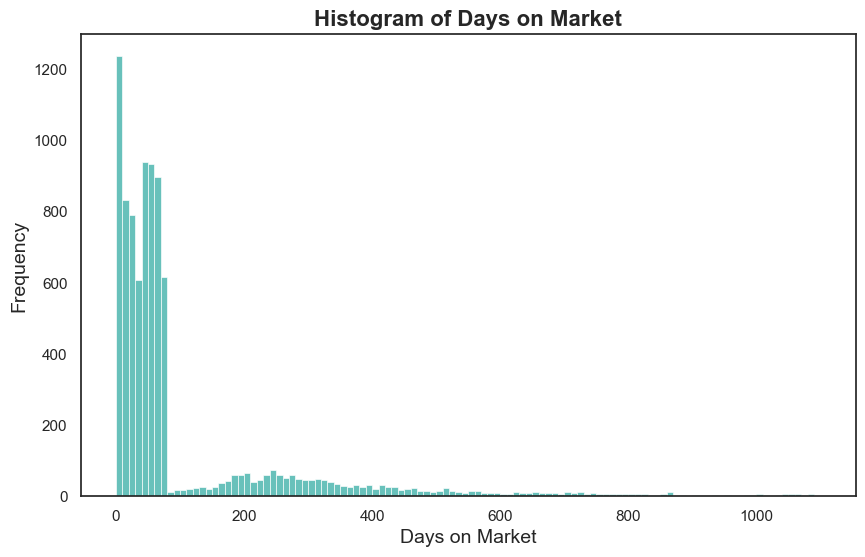

In [8]:
#Test of days on market the figure is not very nice 
palette = sns.color_palette("husl", 8)
turquoise = palette[4]

df['Days on Market'] = pd.to_numeric(df['Days on Market'], errors='coerce')

bin_width = 10  
bins = range(int(df['Days on Market'].min()), int(df['Days on Market'].max()) + bin_width, bin_width)

plt.figure(figsize=(10, 6))
sns.histplot(df['Days on Market'], bins=bins, kde=False, color=turquoise)

# Adding a title and labels
plt.title('Histogram of Days on Market', fontsize=16, weight='bold')
plt.xlabel('Days on Market', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.show()


In [9]:
#I made a rooms histogram that looked stupid so i made a table instead 
room_counts = df['Rooms'].value_counts().sort_index()

room_table = pd.DataFrame({
    'Number of Rooms': room_counts.index,
    'Frequency': room_counts.values
})

print(room_table)

# Convert to overleaf format 
latex_table = room_table.to_latex(index=False)

print(latex_table)


   Number of Rooms  Frequency
0                1         28
1               10         42
2               11         20
3               12          8
4               13          5
5               14          4
6               15          2
7               19          1
8                2        160
9               22          1
10               3        854
11               4       2429
12               5       2672
13               6       1517
14               7        637
15               8        247
16               9        107
\begin{tabular}{lr}
\toprule
Number of Rooms & Frequency \\
\midrule
1 & 28 \\
10 & 42 \\
11 & 20 \\
12 & 8 \\
13 & 5 \\
14 & 4 \\
15 & 2 \\
19 & 1 \\
2 & 160 \\
22 & 1 \\
3 & 854 \\
4 & 2429 \\
5 & 2672 \\
6 & 1517 \\
7 & 637 \\
8 & 247 \\
9 & 107 \\
\bottomrule
\end{tabular}



#